# Making maps

![all the suburbs in sydney](all_burbs.png)

We're going to get some shapefiles from data.gov.au, and then we're going to draw some maps

_itallic_ **bold** 

* list
* another

aaaa

1. first
1. second

## heading 2

### h3

You'll need some prequisite libraries:
```
pip3 install pandas shapely fiona descartes pyproj 
pip3 install geopandas
```
You may have some already but pip will be cool with that.

We're going to get a shapefile of suburb boundaries from here:

https://data.gov.au/dataset/ds-dga-91e70237-d9d1-4719-a82f-e71b811154c6/details

If you are on windows, geopandas might not install properly, in which case, do this:

```
pip install wheel
pip install pipwin
pipwin install numpy
pipwin install pandas
pipwin install shapely
pipwin install gdal
pipwin install fiona
pipwin install pyproj
pipwin install six
pipwin install rtree
pipwin install descartes
pipwin install geopandas
```

Just copy that whole lot into your terminal and it'll sort it out.

In [8]:
import os
import geopandas as gp
import shapely
import fiona
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


shp_file_name = "NSW_LOCALITY_POLYGON_shp/NSW_LOCALITY_POLYGON_shp.shp"
zip_file_name = "nsw_locality_polygon_shp.zip"
web_file_path = ("https://data.gov.au/data/dataset/91e70237-d9d1-4719-a82f-e71b811154c6/resource/5e295412-357c-49a2-98d5-6caf099c2339/download/nsw_locality_polygon_shp.zip")

In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

To get a load of shape files from data.gov.au, more specifically, [here](https://data.gov.au/dataset/nsw-suburb-locality-boundaries-psma-administrative-boundaries/resource/bf8b5180-fcea-44bd-bd76-af14cc4b0fe0)

In [10]:
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

In [11]:
# Get the data loaded. This is a bit complicated because it's online as a zip file.
# If we don't have it right now, we need to get it and unzip it.
if os.path.isfile(shp_file_name):
    print("loading from file")
else:
    if os.path.isfile(zip_file_name):
        print("unzipping")
        unzip_zipfile(zip_file_name)
    else:
        import requests
        print("loading from the internet")
        page = requests.get(web_file_path)
        with open(zip_file_name, 'wb') as z:
            z.write(page.content)
        unzip_zipfile(zip_file_name)

print("done")

unzipping
done


#### Shapefiles are the format that a lot of GIS tools use.

#### GIS means Geographic Information System

pronounced: _gee eye ess_

not pronounced: _jizz_

In [12]:
burbs = gp.GeoDataFrame.from_file("NSW_LOC_POLYGON_shp/NSW_LOC_POLYGON_shp.shp")
burbs.sample(2)

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,NSW_LOCALI,NSW_LOCA_1,NSW_LOCA_2,NSW_LOCA_3,NSW_LOCA_4,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry
1126,37183,2021-02-09,None,NSW2903,2017-11-07,None,MYOLA,None,None,G,None,1,"POLYGON ((150.67137 -35.03722, 150.67125 -35.0..."
4099,36161,2021-02-09,None,NSW718,2015-02-12,None,BURRANDANA,None,None,G,None,1,"POLYGON ((147.37158 -35.38065, 147.37219 -35.3..."


In [13]:
burbs.drop(["NSW_LOCA_1", "NSW_LOCA_3", "NSW_LOCA_4", "DT_RETIRE"], axis=1, inplace=True)
burbs.head(2)

,LC_PLY_PID,DT_CREATE,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry
0,34943,2021-02-09,NSW3128,2018-08-08,ORTON PARK,G,None,1,"POLYGON ((149.55618 -33.46707, 149.55619 -33.4..."
1,34946,2021-02-09,NSW311,2017-08-10,BEROWRA HEIGHTS,G,None,1,"POLYGON ((151.13409 -33.61867, 151.13392 -33.6..."


In [14]:
#  burbs.geometry.plot()
#  could plot, if you had a really fast computer!

LC_PLY_PID                                                34943
DT_CREATE                                            2021-02-09
LOC_PID                                                 NSW3128
NSW_LOCALI                                           2018-08-08
NSW_LOCA_2                                           ORTON PARK
NSW_LOCA_5                                                    G
NSW_LOCA_6                                                 None
NSW_LOCA_7                                                    1
geometry      POLYGON ((149.55618485 -33.4670712, 149.556186...
Name: 0, dtype: object


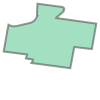

In [15]:
a = burbs.iloc[0]
print(a)
a.geometry

In [16]:
def add_centroid(row):
    return row.geometry.centroid

burbs["centroid"] = burbs.apply(add_centroid, axis=1)

burbs.sample(2)

,LC_PLY_PID,DT_CREATE,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry,centroid
4201,37576,2021-02-09,NSW2219,2013-01-23,KOREELAH,G,None,1,"POLYGON ((152.53490 -28.38687, 152.53488 -28.3...",POINT (152.4469077539112 -28.37000418227149)
1673,36547,2021-02-09,NSW5067,2018-08-08,RENWICK,G,None,1,"POLYGON ((150.48268 -34.44662, 150.48151 -34.4...",POINT (150.4735609868333 -34.44991859931341)


/var/folders/k9/6bdsjmnd0m50v7b524wb005c0000gn/T/ipykernel_61684/286435324.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  burbs.centroid.plot()


<AxesSubplot:>

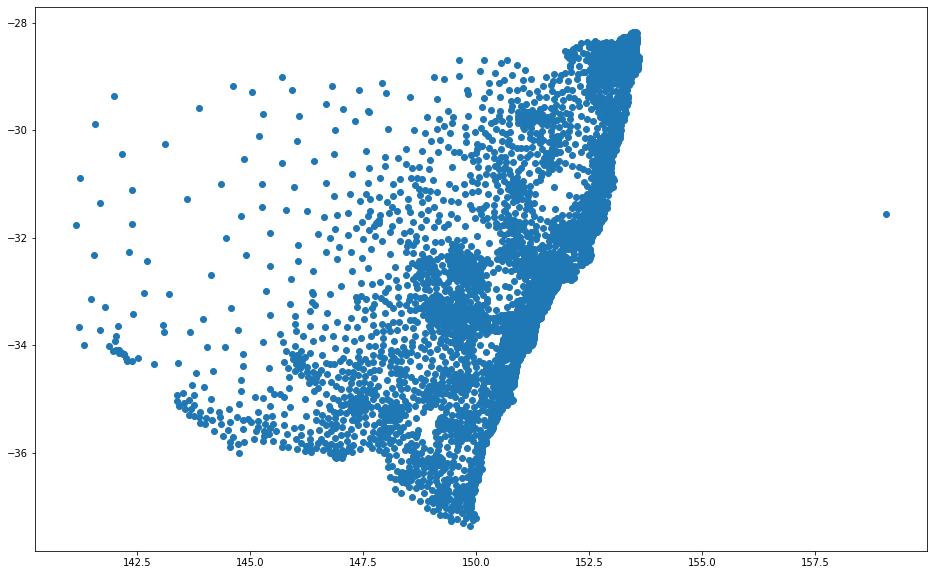

In [17]:
burbs.centroid.plot()

POINT (149.5729917188781 -33.46852327089563)


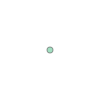

In [18]:
a = burbs.iloc[0]
print(a.centroid)
a.centroid

In [19]:
right_here = shapely.geometry.point.Point(151.2299732, -33.9178754)
burbs["distance_from_UNSW"] = burbs.geometry.distance(right_here)

/var/folders/k9/6bdsjmnd0m50v7b524wb005c0000gn/T/ipykernel_61684/3643385223.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  burbs["distance_from_UNSW"] = burbs.geometry.distance(right_here)


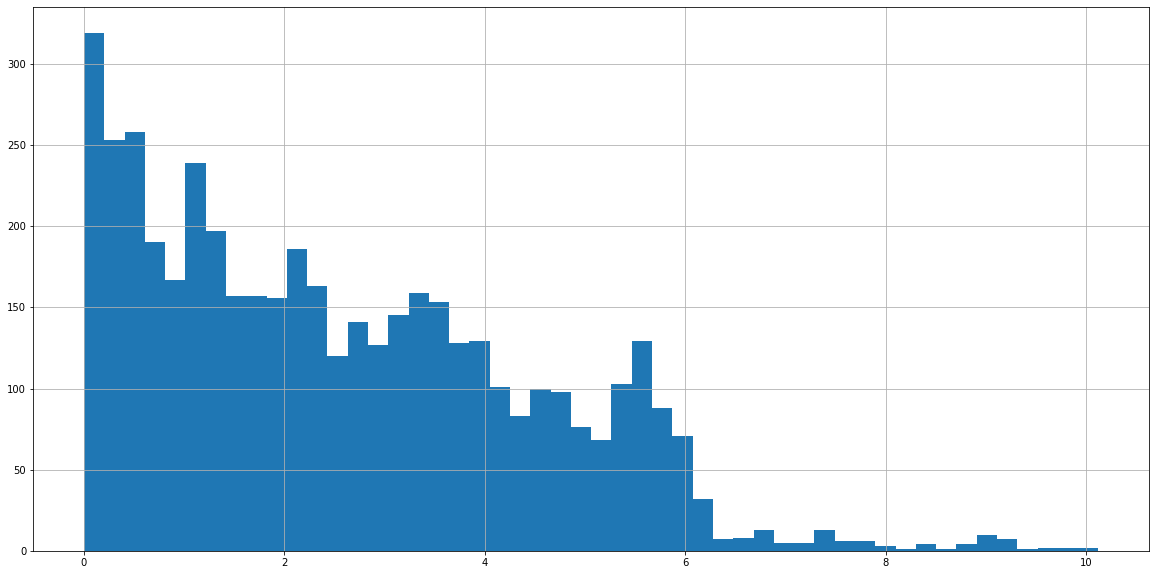

In [20]:
burbs.distance_from_UNSW.hist(bins=50);

This gives distance in whole numbers of lat long I think, i.e. degrees!

Not really sure what to do with that, but let's get rid of everything above 0.2 and see what we can plot:

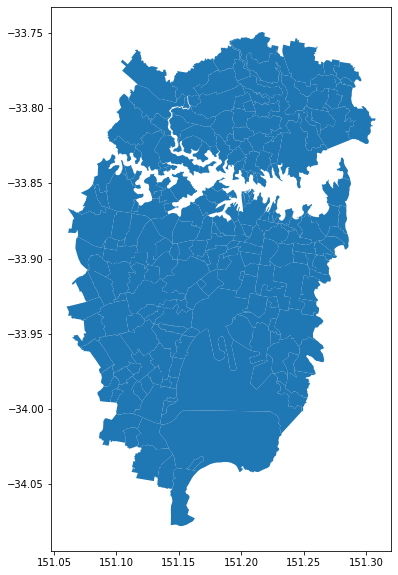

In [28]:
close_burbs = burbs[burbs.distance_from_UNSW < 0.15]
close_burbs.plot();

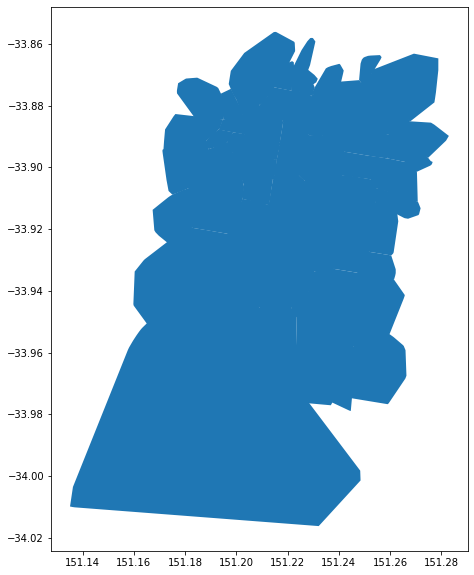

In [22]:
close_burbs.geometry.convex_hull.plot();

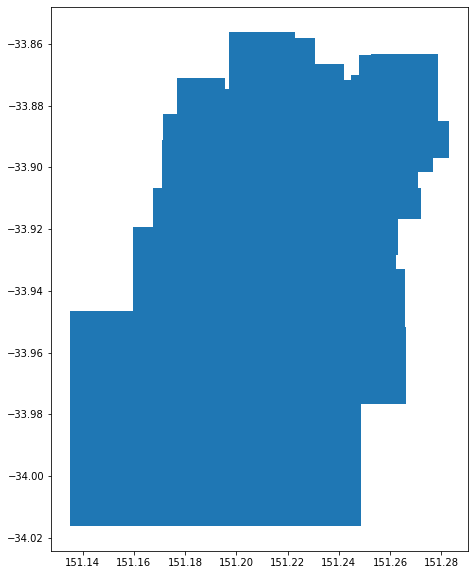

In [23]:
close_burbs.geometry.envelope.plot();

![](http://www.personal.kent.edu/~rmuhamma/Compgeometry/MyCG/Gifs-CompGeometry/ch2.gif)
Convex hulls are a useful aproximation if you want to do fast calculations.

Bounding boxes are even cheaper.

What about putting labels on the map?

/var/folders/k9/6bdsjmnd0m50v7b524wb005c0000gn/T/ipykernel_61684/82923522.py:10: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row.NSW_LOCA_2,


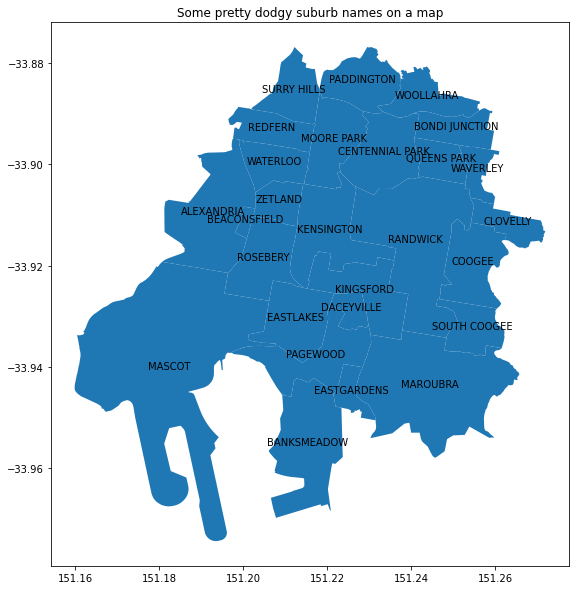

In [24]:
really_close_burbs = burbs[burbs.distance_from_UNSW < 0.03]
really_close_burbs.plot()

for idx, row in really_close_burbs.iterrows():
#     print(idx, row)
#     print("annotation", row.NSW_LOCA_2)
#     print("coords", row.centroid.coords, 
#           "tup", tuple(row.centroid.coords), 
#           "zero", tuple(row.centroid.coords)[0])
    plt.annotate(s=row.NSW_LOCA_2, 
                 xy=tuple(row.centroid.coords)[0],
                 xycoords="data",
                 horizontalalignment='center');
plt.title("Some pretty dodgy suburb names on a map");

We often want to be able to tell if a point is in a suburb or not. We'd do that with a polygon inclusion test.

![](http://www.geeksforgeeks.org/wp-content/uploads/polygon31.png)
[How to check if a given point lies inside or outside a polygon?](http://www.geeksforgeeks.org/how-to-check-if-a-given-point-lies-inside-a-polygon/)

Luckily we've got one built in!

In [25]:
print(right_here)
in_this_burb = None
for _, row in really_close_burbs.iterrows():
    if right_here.within(row.geometry):
        in_this_burb = row
        
in_this_burb

POINT (151.2299732 -33.9178754)


LC_PLY_PID                                                        33726
DT_CREATE                                                    2021-02-09
LOC_PID                                                         NSW2123
NSW_LOCALI                                                   2012-05-04
NSW_LOCA_2                                                   KENSINGTON
NSW_LOCA_5                                                            G
NSW_LOCA_6                                                         None
NSW_LOCA_7                                                            1
geometry              POLYGON ((151.22572012 -33.91092937, 151.22571...
centroid                   POINT (151.2206407350085 -33.91336830519568)
distance_from_UNSW                                                  0.0
Name: 338, dtype: object

This might actually be a case where a `lambda` is a good idea:

In [26]:
in_this_burb = really_close_burbs[really_close_burbs.apply(lambda x: right_here.within(x.geometry) , axis=1)]
in_this_burb

,LC_PLY_PID,DT_CREATE,LOC_PID,NSW_LOCALI,NSW_LOCA_2,NSW_LOCA_5,NSW_LOCA_6,NSW_LOCA_7,geometry,centroid,distance_from_UNSW
338,33726,2021-02-09,NSW2123,2012-05-04,KENSINGTON,G,None,1,"POLYGON ((151.22572 -33.91093, 151.22571 -33.9...",POINT (151.2206407350085 -33.91336830519568),0.0


How about colouring suburbs according to some kind of scalar value?

[That's called a _chloropleth_](http://geopandas.readthedocs.io/en/latest/mapping.html?highlight=color#chloropleth-maps)

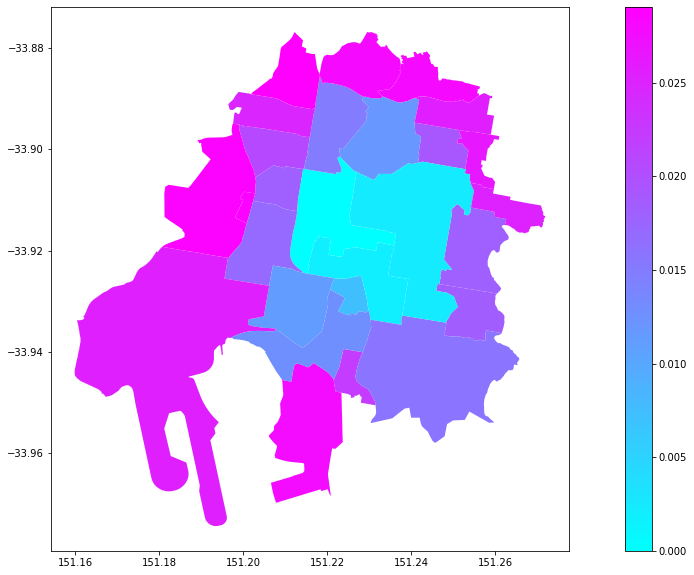

In [27]:
really_close_burbs.plot(column='distance_from_UNSW', cmap='cool', legend=True);

I don't think that could be any easier!

You can see the list of [colour scale options here](http://matplotlib.org/users/colormaps.html)

## Handy links

* [Geopandas docs](http://geopandas.readthedocs.io)
* [Geopandas on GitHib](https://github.com/geopandas/geopandas)
* [Another map making tutorial](http://sensitivecities.com/so-youd-like-to-make-a-map-using-python-EN.html)
* [MatPlotLib colour scale options](http://matplotlib.org/users/colormaps.html)

I'd love to hear if you come across any other useful things!